# Introduction to Data Visualization with Pokémon

## Getting Started

We will need to import the [Pandas](https://pandas.pydata.org/) and [Plotly](https://github.com/plotly/plotly.py) libraries for our exploration today. Pandas is a library used for analyzing, cleaning, exploring, and manipulating data. Plotly is a library used for graphing.

`▶Run` the next cell to import the required libraries for our exploration.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from IPython.display import HTML
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
USE_PYGEOS = 0

## Importing the Dataset 

Free public datasets are available on the internet on websites such as [Kaggle](https://www.kaggle.com/datasets), which may be used for artificial intelligence (AI), machine learning (ML), and data science projects. We will be using the [Pokémon dataset from Alberto Barradas](https://www.kaggle.com/datasets/abcsds/pokemon) for our exploration today.

[DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) are the primary data structure for the
Pandas library. The [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function is used to read a .csv file into the DataFrame, which has been named `pokemon`. 

`▶Run` the next cell to import the Pokémon dataset into the `pokemon` dataframe.

In [3]:
pokemon = pd.read_csv('https://raw.githubusercontent.com/kyliehlchan/educ-4769/master/Pokemon.csv')

## Viewing the Dataset

To test whether our dataset has the correct data in it, [DataFrame.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function is useful. The function returns the first *n* rows in the dataframe. If the *n* variable of the number of rows is not specified, such as in `pokemon.head()`, the default value for *n* is 5 and the first five rows will be returned. Otherwise, it will return the number of rows specified.

`▶Run` the next cell to view the first five rows of the `pokemon` dataframe.

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In the next cell, change the number of rows that are to be returned from the dataset by adding a number into the paratheses of the function and `▶Run`. What do you notice?

In [5]:
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


## What graph should we use for what data?

As we look at the headers above, the dataset includes the following information:

* **#:** ID for each pokemon
* **Name:** Name of each pokemon
* **Type 1:** Each pokemon has a type, this determines weakness/resistance to attacks
* **Type 2:** Some pokemon are dual type and have 2
* **Total:** sum of all stats that come after this, a general guide to how strong a pokemon is
* **HP:** hit points, or health, defines how much damage a pokemon can withstand before fainting
* **Attack:** the base modifier for normal attacks (e.g. Scratch, Punch)
* **Defense:** the base damage resistance against normal attacks
* **SP Atk:** special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* **SP Def:** the base damage resistance against special attacks
* **Speed:** determines which pokemon attacks first each round
* **Generation:** The numbered generation in which the pokemon was first introduced
* **Legendary:** Denotes using true or false whether the pokemon is legendary 

We will be creating graphs for the following datasets today: 

* Number of pokemon per type
* Number of pokemon per type
* HP across all pokemon
* Statistics (i.e. HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) by generation

We will be using bar graphs, histograms, line graphs, and circle graphs for today's exploration. Each data set will be best represented using a graph type. 

Before continuing on, please discuss with a class mate about what you have matched as the most appropriate graphs for each dataset.


## Bar Graph

Bar graphs are best used to represent categorical data of the same attribute across different groups. 

We will be using a bar graph to represent the number of pokemon per type. 

### Colour Coding

To colour-code our bar graph later on, we will first create a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp), storing the type in the key, and the hex code for the colour in the value.

`▶Run` the next cell to create the dictionary for the types and their hex codes.

In [6]:
colours = {
    "Bug": "#A6B91A",
    "Dark": "#705746",
    "Dragon": "#6F35FC",
    "Electric": "#F7D02C",
    "Fairy": "#D685AD",
    "Fighting": "#C22E28",
    "Fire": "#EE8130",
    "Flying": "#A98FF3",
    "Ghost": "#735797",
    "Grass": "#7AC74C",
    "Ground": "#E2BF65",
    "Ice": "#96D9D6",
    "Normal": "#A8A77A",
    "Poison": "#A33EA1",
    "Psychic": "#F95587",
    "Rock": "#B6A136",
    "Steel": "#B7B7CE",
    "Water": "#6390F0",
}

### Creating the Bar Graph

We will create a bar graph with the number of pokemon per type, with the number of pokemon on the y-axis and the type on the x-axis. 

[DataFrame.groupby.count()](https://sparkbyexamples.com/pandas/pandas-groupby-count-examples) is a function that will group the rows by a specified column, and will calculate how many times each value is present. This will give us the number of pokemon in each type, and store it in our `types` dataframe.

The `types_name` are retrieved from the `colours` dictionary that was created in the last cell. 

`▶Run` the next cell to create our bar graph.

In [7]:
types = (pokemon.groupby(['Type 1'])['Type 1'].count())
types_name = list(types.keys())

fig = px.bar(data_frame = pokemon, 
             x = types_name, 
             y = types.values, 
             color = types_name, 
             color_discrete_map = colours,
             labels = {'x':'Type','y':'Number of Pokemon'},
             title = 'Number of Pokemon Per Type')

fig.update_layout(showlegend = False)
fig.show()

## Histogram

Histograms are best used to represent quantitative data, showing the frequency of an occurrence. 

We will be using a histogram to to represent HP across all pokemon.

### Creating the Histogram

We will create a histogram with the frequency (i.e. number of pokemon) on the y-axis and the HP on the x-axis. 

`▶Run` the next cell to create our histogram.

In [8]:
fig = px.histogram(data_frame = pokemon, x = 'HP', nbins = 50, labels = {'x': 'HP'}, title = 'Histogram of Pokemon HP')
fig.update_layout(yaxis_title="Number of Pokemon") 
fig.show()

## Line Graph

Line graphs are best used to represent quantitative data, showing change over a specified time value.

We will be using a line graph to represent the average statistics of pokemon (i.e. HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) for the first six generation of pokemon.

### Creating the Line Graph

We will create a line graph with the average statistic in points on the y-axis and the generation on the x-axis.

`▶Run` the next cell to create our line graph.

In [9]:
def stats_by(classifier):
    
    data = []
    stats_names = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    stats = pokemon.groupby(classifier)[stats_names].mean().reset_index()
    
    for stat in stats_names:
        stat_line = go.Scatter(
            x = stats[classifier],
            y = stats[stat],
            name = stat,
            line = dict(width = 3),
        )
        data.append(stat_line)

    layout = go.Layout(
        title = 'Trend of stats by {}'.format(classifier),
        xaxis = dict(title = classifier),
        yaxis = dict(title = 'Points')
    )

    trend = go.Figure(data = data, layout = layout)
    iplot(trend, filename = 'trend')

stats_by('Generation')

## Circle Graph

A circle graph, or a pie chart, is best used to represent categorical data as part of a whole.

We will be using a circle graph to represent the number of pokemon per type, similar to the bar graph.

### Creating the Circle Graph 

We will create a circle graph with the type of pokemon represented as a slice and as a percentage. 

`▶Run` the next cell to create our circle graph.

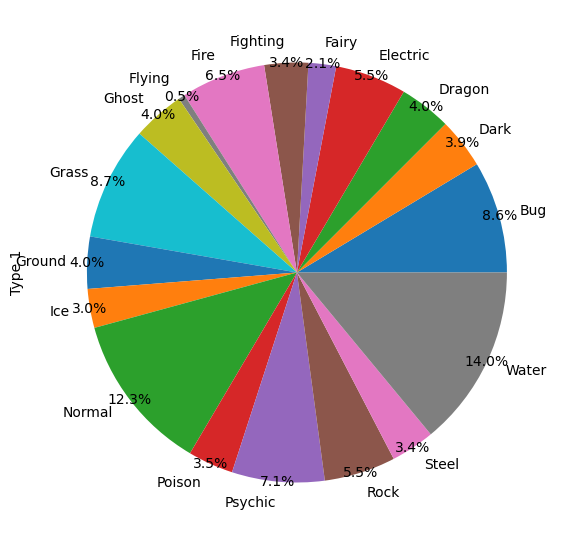

In [11]:
fig = plt.figure(figsize=(15,15))

fig.add_subplot(211)
types.plot(kind = 'pie', autopct = '%1.1f%%', pctdistance = 1.0)

plt.show()